In [107]:
%reload_ext autoreload
%autoreload 2

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
from my_utils.data_viz import *

In [109]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [110]:
data = pd.read_csv('data_workflow.csv')
data.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [111]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [116]:
quick_check(df, 'survived',plot_overview=False)

T̲a̲r̲g̲e̲t̲ ̲o̲v̲e̲r̲v̲i̲e̲w̲:

  The target is survived.
  It is composed of 0% of np.nan.
  Its dtypes is int64.
  Without specifying an estimator_job, the target will be considered as categorical.


F̲e̲a̲t̲u̲r̲e̲s̲ ̲o̲v̲e̲r̲v̲i̲e̲w̲:

  There is 15 columns which are:

    - 13.33% of them seem to be numerical: [age, fare];

    - 86.67% of them seem to be categorical: [survived, pclass, sex, sibsp, parch, embarked, class, who, adult_male, deck, embark_town, alive, alone];

D̲t̲y̲p̲e̲s̲ ̲o̲v̲e̲r̲v̲i̲e̲w̲:

  Dataset has 6 different dtypes which are:

    - int64 corresponds to 26.67% of columns and includes columns: survived, pclass, sibsp, parch

    - object corresponds to 33.33% of columns and includes columns: sex, embarked, who, embark_town, alive

    - float64 corresponds to 13.33% of columns and includes columns: age, fare

    - category corresponds to 6.67% of columns and includes columns: class

    - bool corresponds to 13.33% of columns and includes columns: adult_male

In [57]:
data.kurt()

/var/folders/3y/s6r1wjkx4flbn7tcx695504c0000gn/T/ipykernel_36427/2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


age        -1.245293
bmi        -0.024964
children    0.202454
smoker      0.145756
charges     1.606299
dtype: float64

In [2]:
import pySankey

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

def mosaic_plot(df,X,y,ax=None):
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    couples = list(df[['survived','class']].groupby(['survived','class']).size().astype(str).index)
    cross = pd.crosstab(df['survived'],df['class'])
    props = lambda x: {'facecolor': default_colors[int(x[0])],'edgecolor':'w'}
    labelizer = lambda k: {(str(couple[0]),str(couple[1])) : f'{couple[0]}-{couple[1]}\n{round(cross.loc[couple[0],couple[1]]/cross.loc[couple[0]].sum()*100,2)}%'  for couple in toto}[k]
    mosaic(df, ['survived', 'class'],properties=props2,labelizer = labelizer, ax=ax)

In [594]:
df[['pclass','survived']]

,pclass,survived
0,3,0
1,1,1
2,3,1
3,1,1
...,...,...
887,1,1
888,3,0
889,1,1
890,3,0


In [24]:
import pandas as pd
from pySankey.sankey import sankey

sankey(df['survived'], df['pclass'], aspect=20,fontsize=12)
# Result is in "fruit.png"

In [3]:
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def check_data_matches_labels(labels, data, side):
    if len(labels > 0):
        if isinstance(data, list):
            data = set(data)
        if isinstance(data, pd.Series):
            data = set(data.unique().tolist())
        if isinstance(labels, list):
            labels = set(labels)
        if labels != data:
            msg = "\n"
            if len(labels) <= 20:
                msg = "Labels: " + ",".join(labels) + "\n"
            if len(data) < 20:
                msg += "Data: " + ",".join(data)
            raise LabelMismatch('{0} labels and data do not match.{1}'.format(side, msg))


def dankey(left, right, leftWeight=None, rightWeight=None, colorDict=None,
           leftLabels=None, rightLabels=None, aspect=4, rightColor=False,
           fontsize=14, figureName=None, closePlot=False,ax=None):
    '''
    Make Sankey Diagram showing flow from left-->right
    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = order of the right labels in the diagram
        aspect = vertical extent of the diagram in units of horizontal extent
        rightColor = If true, each strip in the diagram will be be colored
                    according to its left label
    Ouput:
        None
    '''
    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                              'rightWeight': rightWeight}, index=range(len(left)))

    if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(dataFrame.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(dataFrame.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        palette = "hls"
        colorPalette = sns.color_palette(palette, len(allLabels))
        for i, label in enumerate(allLabels):
            colorDict[label] = colorPalette[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            msg = "The colorDict parameter is missing values for the following labels : "
            msg += '{}'.format(', '.join(missing))
            raise ValueError(msg)

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for leftLabel in leftLabels:
        leftDict = {}
        rightDict = {}
        for rightLabel in rightLabels:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        ns_l[leftLabel] = leftDict
        ns_r[leftLabel] = rightDict

    # Determine positions of left label patches and total widths
    leftWidths = defaultdict()
    for i, leftLabel in enumerate(leftLabels):
        myD = {}
        myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        leftWidths[leftLabel] = myD

    # Determine positions of right label patches and total widths
    rightWidths = defaultdict()
    for i, rightLabel in enumerate(rightLabels):
        myD = {}
        myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        rightWidths[rightLabel] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for leftLabel in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [leftWidths[leftLabel]['bottom']],
            2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
            color=colorDict[leftLabel],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
            leftLabel,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for rightLabel in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
            2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
            color=colorDict[rightLabel],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax,
            rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
            rightLabel,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for leftLabel in leftLabels:
        for rightLabel in rightLabels:
            labelColor = leftLabel
            if rightColor:
                labelColor = rightLabel
            if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
                # Create array of y values for each strip, half at left value,
                # half at right, convolve
                ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
                rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[labelColor]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 6)
    if figureName != None:
        plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()
    plt.show()

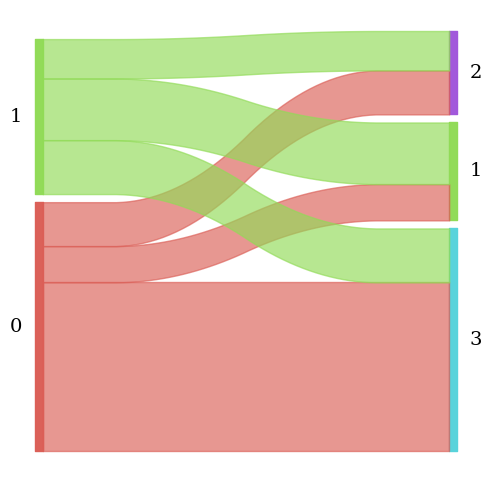

In [4]:
dankey(df['survived'], df['pclass'])